### Decision Tree Classifier

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
from training_and_testing_data import X_trainset, X_testset, Y_trainset, Y_testset
from sklearn.tree import DecisionTreeClassifier

In [2]:
testtree = DecisionTreeClassifier(criterion="entropy", max_depth = None)


In [4]:
testtree.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
predTree = testtree.predict(X_testset)

In [14]:
cnf_matrix = confusion_matrix(Y_testset,predTree)

print(confusion_matrix(Y_testset,predTree))
print(classification_report(Y_testset,predTree))

[[4431 2579]
 [2562 4161]]
             precision    recall  f1-score   support

          0       0.63      0.63      0.63      7010
          1       0.62      0.62      0.62      6723

avg / total       0.63      0.63      0.63     13733



In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4431 2579]
 [2562 4161]]


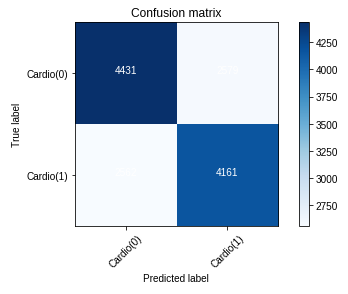

In [19]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Cardio(0)','Cardio(1)'],normalize= False,  title='Confusion matrix')
plt.style.use("seaborn")